<a href="https://colab.research.google.com/github/proguimador1/facial-recognition/blob/main/reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas necessárias

In [8]:
from os import listdir
import numpy as np
import cv2
from PIL import Image
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import image_dataset_from_directory
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import matplotlib.pyplot as plt

# Fazendo o pré-processamento

Carregando o dataset

In [6]:
!unzip "/content/drive/MyDrive/datasets/orl_database.zip"

Archive:  /content/drive/MyDrive/datasets/orl_database.zip
   creating: orl_database/
   creating: orl_database/persona_1/
  inflating: orl_database/persona_1/10_1.jpg  
  inflating: orl_database/persona_1/1_1.jpg  
  inflating: orl_database/persona_1/2_1.jpg  
  inflating: orl_database/persona_1/3_1.jpg  
  inflating: orl_database/persona_1/4_1.jpg  
  inflating: orl_database/persona_1/5_1.jpg  
  inflating: orl_database/persona_1/6_1.jpg  
  inflating: orl_database/persona_1/7_1.jpg  
  inflating: orl_database/persona_1/8_1.jpg  
  inflating: orl_database/persona_1/9_1.jpg  
   creating: orl_database/persona_10/
  inflating: orl_database/persona_10/100_10.jpg  
  inflating: orl_database/persona_10/91_10.jpg  
  inflating: orl_database/persona_10/92_10.jpg  
  inflating: orl_database/persona_10/93_10.jpg  
  inflating: orl_database/persona_10/94_10.jpg  
  inflating: orl_database/persona_10/95_10.jpg  
  inflating: orl_database/persona_10/96_10.jpg  
  inflating: orl_database/persona_

Carregando as imagens

In [36]:
img_height = 70
img_width = 80
#batch_size = 32

data_dir = "/content/orl_database"

train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  )

val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  )

class_names = train_ds.class_names

#verificando o image shape
for images in train_ds:
  for image in images[0]:
    print(image.shape)


Found 400 files belonging to 40 classes.
Using 320 files for training.
Found 400 files belonging to 40 classes.
Using 80 files for validation.
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 80, 3)
(70, 

Normalizando

In [16]:
normalization_layer = keras.layers.Rescaling(1./255)

norm_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

norm_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Treinando o modelo

Criando o modelo

In [37]:
num_classes = len(class_names)

def creat_model():
  cnn = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(70, 80, 3)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(num_classes, activation='softmax')
  ])

  cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

  return cnn

Treinamento padrão

In [44]:
cnn = creat_model()

history = cnn.fit(norm_train_ds, validation_data = norm_val_ds,\
                  epochs=15)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.0254 - loss: 3.7782 - val_accuracy: 0.0375 - val_loss: 3.6780
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.0931 - loss: 3.6126 - val_accuracy: 0.0500 - val_loss: 3.5723
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.2263 - loss: 3.2495 - val_accuracy: 0.2625 - val_loss: 3.0019
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.4575 - loss: 2.5649 - val_accuracy: 0.5125 - val_loss: 2.1463
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.7560 - loss: 1.3847 - val_accuracy: 0.7250 - val_loss: 1.1364
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.9290 - loss: 0.5242 - val_accuracy: 0.7875 - val_loss: 0.7416
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.9307 - loss: 0.2875 - val_accuracy: 0.8125 - val_loss: 0.5539
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.9725 - loss: 0.1893 - val_accuracy: 0.8625 - val_

In [45]:
cnn.evaluate(norm_val_ds, return_dict=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.0747


{'accuracy': 1.0, 'loss': 0.08710036426782608}

Avaliando métricas durante o treino


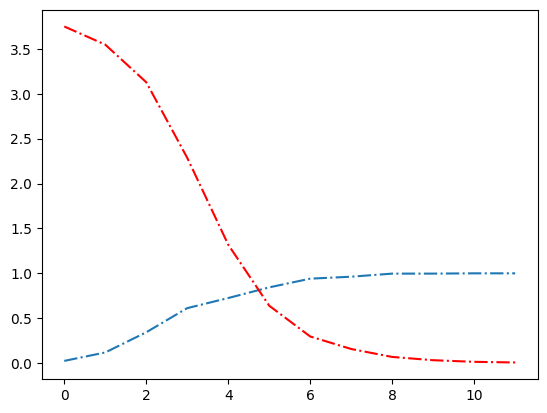

In [43]:
loss_scores = history.history['loss']
acc_scores = history.history['accuracy']

plt.plot(acc_scores, '-.',label ='Acurácia')
plt.plot(loss_scores, '-.',label ='Perda', color='red')
plt.show()

Salvando o modelo

In [46]:
cnn.save("/content/drive/MyDrive/models/cnn_lamac.keras")

cnn.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 68, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 34, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,151,930 (27.28 MB)

 Trainable params: 2,383,976 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,767,954 (18.19 MB)

# Testando o modelo

## **Teste 2: Reconhecimento com Labeled Faces in the Wild**

Caregando o dataset

In [ ]:
!unzip "/content/drive/MyDrive/datasets/lfw-deepfunneled.zip"

Archive:  /content/drive/MyDrive/datasets/lfw-deepfunneled.zip
   creating: lfw-deepfunneled/
   creating: lfw-deepfunneled/Michael_Schumacher/
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0009.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0003.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0005.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0002.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0008.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0017.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0006.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0016.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0011.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0014.jpg  
  inflating: lfw-deepfunneled/Michael_Schumacher/Michael_Schumache

Preparando as imagens

In [ ]:
new_images = []
new_labels = []

label = 0

for diretorio in listdir("/content/lfw-deepfunneled"):
  for image in listdir(f"/content/lfw-deepfunneled/"\
                       f"{diretorio}"):
    img = Image.open(f"/content/lfw-deepfunneled/{diretorio}/{image}")
    img = img.resize((80, 70)) # Resize to (width, height)
    img = img.convert("L")
    img = np.array(img)
    # Reshape to (height, width, channels) to match model's input shape (70, 80, 1)
    img = img.reshape(70, 80, 1) # Add channel dimension
    new_images.append(img)
    new_labels.append(label)
  label += 1

new_images = np.array(new_images) # Convert list of images to a single numpy array
new_labels = np.array(new_labels)

Fazendo o transfer-learning

In [ ]:
aux = base_model.layers[-2].output
# The output Dense layer should have a number of neurons equal to the number of unique classes.
# len(set(new_labels)) gives the count of unique classes.
new_output = Dense(len(set(new_labels)), activation='softmax')(aux)
new_model = keras.Model(inputs=base_model.layers[0].input, outputs=new_output)

for layer in new_model.layers[:-1]:
    layer.trainable = False

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_images, new_labels,
                                                    test_size=0.2,
                                                    random_state = 6)

new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = new_model.fit(x_train, y_train, epochs=70)

test_loss, test_acc = new_model.evaluate(x_test, y_test, verbose=0)

print(f'Acurácia: {test_acc}')
print(f'Perda: {test_loss}')

Epoch 1/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.0213 - loss: 20.3697
Epoch 2/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0362 - loss: 10.8058
Epoch 3/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0224 - loss: 8.1671
Epoch 4/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0355 - loss: 7.6102
Epoch 5/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0185 - loss: 7.1201
Epoch 6/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.0402 - loss: 6.8508
Epoch 7/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.0516 - loss: 6.5594
Epoch 8/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.0537 - loss: 6.1432
Epoch 9/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.0491 - loss: 6.0872
Epoch 10/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0759 - loss: 5.7253
Epoch 11/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0717 - loss: 5.5808
Epoch 12/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accurac

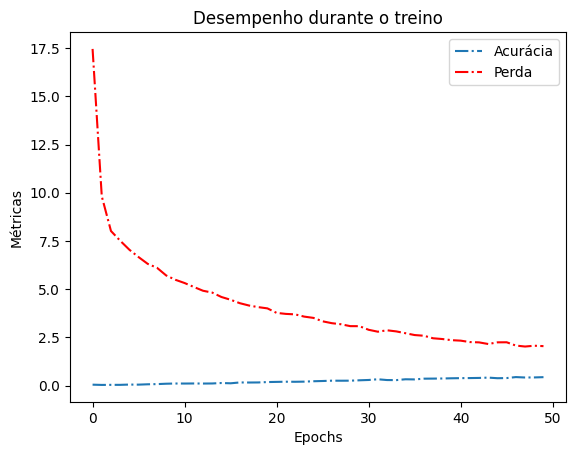

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']

plt.plot(acc_values, '-.',label ='Acurácia')
plt.plot(loss_values, '-.',label ='Perda', color='red')

#plt.ylim(0, 2)

plt.xlabel('Epochs')
plt.ylabel('Métricas')
plt.legend()
plt.title('Desempenho durante o treino')
plt.show()

## **Teste 3: Reconhecimento com nova versão do Labeled Faces in the Wild (faces extraídas com viola_jones)**

Carregando o dataset

In [ ]:
!unzip "/content/drive/MyDrive/datasets/new-lfw-deepfunneled.zip"

Archive:  /content/drive/MyDrive/datasets/new-lfw-deepfunneled.zip
   creating: new-lfw-deepfunneled/
   creating: new-lfw-deepfunneled/Michael_Schumacher/
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0009.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0003.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0005.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0002.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0008.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0017.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0006.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0016.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_Schumacher_0011.jpg.png  
  inflating: new-lfw-deepfunneled/Michael_Schumacher/Michael_

Preparando as imagens

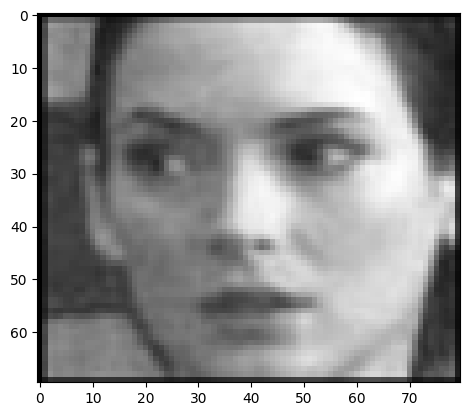

In [ ]:
new_images = []
new_labels = []

label = 0

for diretorio in listdir("/content/new-lfw-deepfunneled"):
  for image in listdir(f"/content/new-lfw-deepfunneled/"\
                       f"{diretorio}"):
    img = Image.open(f"/content/new-lfw-deepfunneled/{diretorio}/{image}")
    img = img.resize((80, 70)) # Resize to (width, height)
    img = img.convert("L")
    img = np.array(img)
    # Reshape to (height, width, channels) to match model's input shape (70, 80, 1)
    img = img.reshape(70, 80, 1) # Add channel dimension
    new_images.append(img)
    new_labels.append(label)
  label += 1

new_images = np.array(new_images) # Convert list of images to a single numpy array
new_labels = np.array(new_labels)

plt.imshow(new_images[0], cmap="gray")
plt.show()

Fazendo o transfer-learning

In [ ]:
aux = base_model.layers[-2].output
# The output Dense layer should have a number of neurons equal to the number of unique classes.
# len(set(new_labels)) gives the count of unique classes.
new_output = Dense(len(set(new_labels)), activation='softmax')(aux)
new_model = keras.Model(inputs=base_model.layers[0].input, outputs=new_output)

for layer in new_model.layers[:-1]:
    layer.trainable = False

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_images, new_labels,
                                                    test_size=0.2,
                                                    random_state = 6)

new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = new_model.fit(x_train, y_train, epochs=50)

test_loss, test_acc = new_model.evaluate(x_test, y_test, verbose=0)

print(f'Acurácia: {test_acc}')
print(f'Perda: {test_loss}')

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.0279 - loss: 10.8087
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.0391 - loss: 6.5053
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.0310 - loss: 5.2586
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.0276 - loss: 4.9346
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0446 - loss: 4.6489
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0583 - loss: 4.3422
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.0830 - loss: 4.1598
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.0933 - loss: 3.8811
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1143 - loss: 3.7453
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.1133 - loss: 3.6816
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1355 - loss: 3.5836
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy

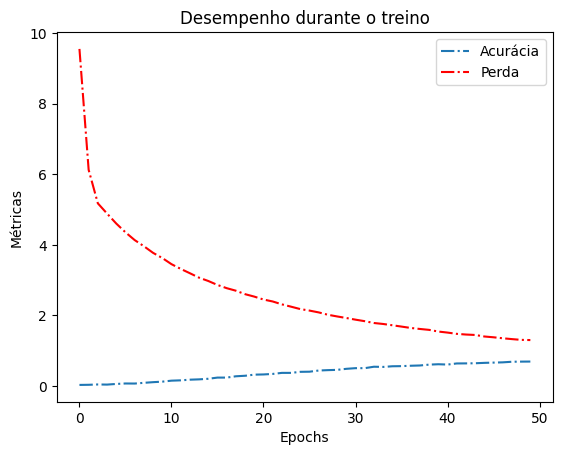

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']

plt.plot(acc_values, '-.',label ='Acurácia')
plt.plot(loss_values, '-.',label ='Perda', color='red')
#plt.xlim(0, 80)
#plt.ylim(0, 2)

plt.xlabel('Epochs')
plt.ylabel('Métricas')
plt.legend()
plt.title('Desempenho durante o treino')
plt.show()